In [10]:
# File: notebooks/02_analysis_and_plots.ipynb
import sys
sys.path.append('../src')
import lsm_pricer
import matplotlib.pyplot as plt
import numpy as np

# Add this line at the beginning of your simulation cell
np.random.seed(42) # The number 42 is arbitrary, any integer will work

# --- Set Simulation Parameters ---
S0 = 90.0
K = 100.0
r = 0.03
sigma = 0.15
T = 1.0
N_steps = 50   # Fewer steps makes the boundary plot clearer
N_paths = 5000000
basis_degree = 3

# --- Run simulation and pricing/boundary finding ---
print("Running simulation and finding boundary...")
stock_paths = lsm_pricer.simulate_gbm_paths(S0, r, sigma, T, N_steps, N_paths)


Running simulation and finding boundary...


In [11]:
# Use the new function
price, boundary = lsm_pricer.price_and_find_boundary(
    stock_paths, K, r, T, basis_degree, 'put'
)
print(f"Calculated price: {price:.4f}")

Calculated price: 10.7171


In [12]:

# --- Create the Plot ---
# Time steps array (excluding t=0 and t=T where the boundary is known)
time_grid = np.linspace(0, T, N_steps + 1)[1:-1]
# We only calculated for t=1 to t=N-1. Let's filter out NaNs.
valid_boundary_idx = ~np.isnan(boundary[1:N_steps])
valid_time = time_grid[valid_boundary_idx]
valid_boundary = boundary[1:N_steps][valid_boundary_idx]

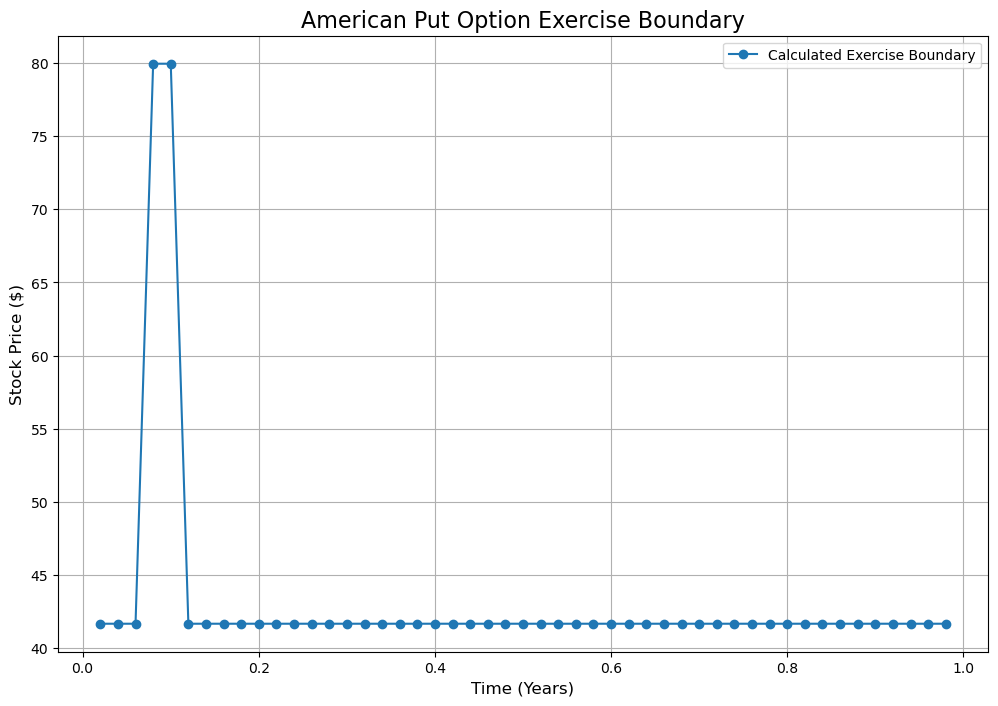

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(valid_time, valid_boundary, 'o-', label='Calculated Exercise Boundary')
plt.title('American Put Option Exercise Boundary', fontsize=16)
plt.xlabel('Time (Years)', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# --- Part 1: American Call Exercise Boundary ---

print("--- Calculating American Call Boundary ---")

# We can reuse the same stock paths from the put calculation
# Or generate new ones. Let's use the stable ones we already have.
price_call, boundary_call = lsm_pricer.price_and_find_boundary(
    stock_paths, K, r, T, basis_degree, 'call'
)
print(f"Calculated American Call Price: {price_call:.4f}")


--- Calculating American Call Boundary ---
Calculated American Call Price: 2.7482


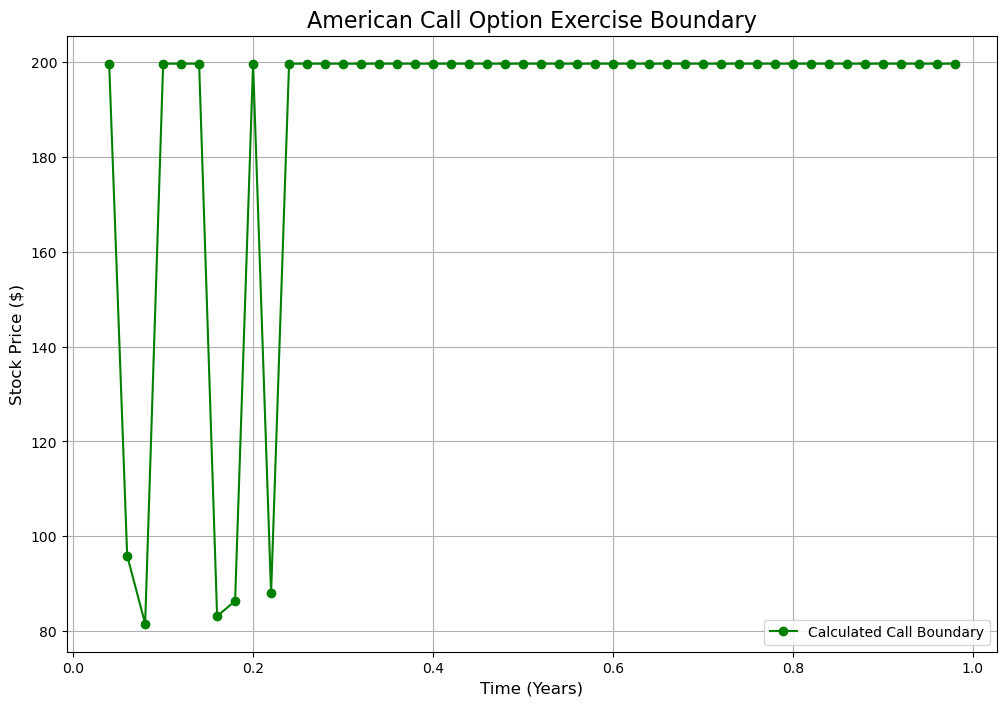

In [15]:
# --- Plot the Call Boundary ---
time_grid = np.linspace(0, T, N_steps + 1)[1:-1]
valid_boundary_idx_call = ~np.isnan(boundary_call[1:N_steps])
valid_time_call = time_grid[valid_boundary_idx_call]
valid_boundary_call = boundary_call[1:N_steps][valid_boundary_idx_call]

plt.figure(figsize=(12, 8))
plt.plot(valid_time_call, valid_boundary_call, 'o-', color='green', label='Calculated Call Boundary')
plt.title('American Call Option Exercise Boundary', fontsize=16)
plt.xlabel('Time (Years)', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# --- Part 2: Algorithm Convergence Plot ---

print("\n--- Checking Algorithm Convergence ---")
# We will check convergence for the American Put Option
path_counts = [10000, 20000, 40000, 80000, 150000, 250000]
option_prices = []

for n_p in path_counts:
    print(f"Pricing with {n_p} paths...")
    # Generate fresh paths for each pricing run
    sim_paths = lsm_pricer.simulate_gbm_paths(S0, r, sigma, T, N_steps, n_p)
    # Use the faster pricing function since we don't need the boundary here
    price = lsm_pricer.price_american_option(sim_paths, K, r, T, basis_degree, 'put')
    option_prices.append(price)
    print(f"  -> Price: {price:.4f}")


--- Checking Algorithm Convergence ---
Pricing with 10000 paths...
  -> Price: 10.7070
Pricing with 20000 paths...
  -> Price: 10.6271
Pricing with 40000 paths...
  -> Price: 10.7370
Pricing with 80000 paths...
  -> Price: 10.6805
Pricing with 150000 paths...
  -> Price: 10.7230
Pricing with 250000 paths...
  -> Price: 10.7194


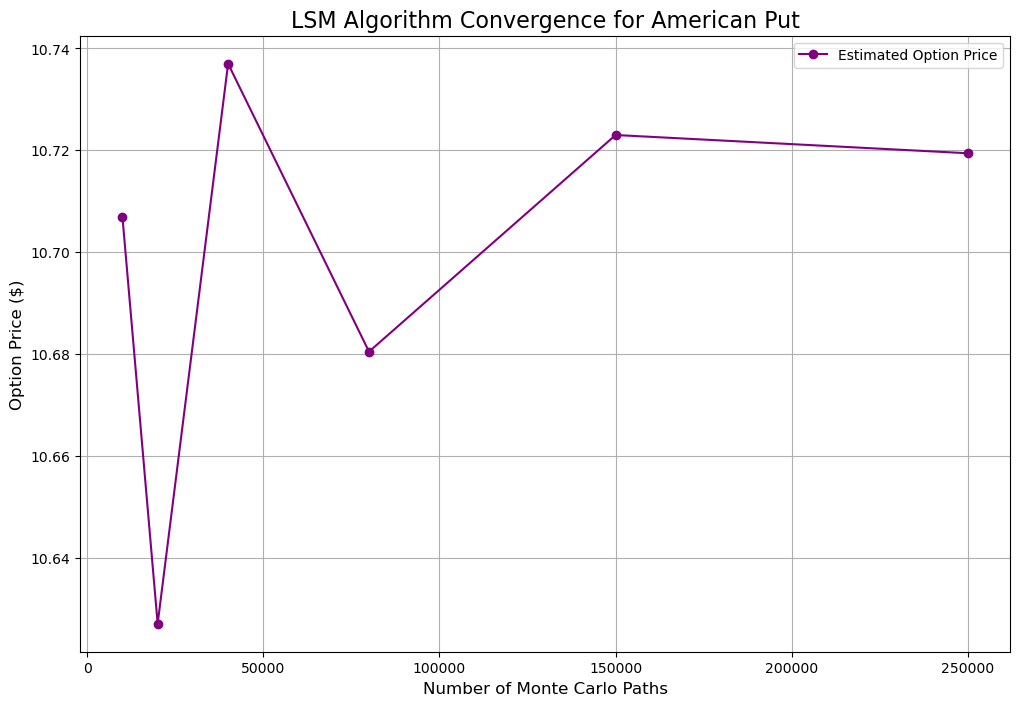

In [17]:
# --- Plot the Convergence ---
plt.figure(figsize=(12, 8))
plt.plot(path_counts, option_prices, 'o-', color='purple', label='Estimated Option Price')
plt.title('LSM Algorithm Convergence for American Put', fontsize=16)
plt.xlabel('Number of Monte Carlo Paths', fontsize=12)
plt.ylabel('Option Price ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# --- Validation for S0 = 90 ---
np.random.seed(42) # For reproducibility
sim_paths_90 = lsm_pricer.simulate_gbm_paths(S0=90.0, r=r, sigma=sigma, T=T, N_steps=100, N_paths=500000)
price_90 = lsm_pricer.price_american_option(sim_paths_90, K=K, r=r, T=T, basis_degree=3, option_type='put')
print(f"Calculated Price for S0=90: {price_90:.4f}")

Calculated Price for S0=90: 10.7203
